<a href="https://colab.research.google.com/github/vedant511/airline-delays/blob/master/airline_delays_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1

### **Import the libraries**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import cycle

### Read in the data and have a first look

In [0]:
flights = pd.read_csv('formatted_flights.csv', index_col=None)
flights.drop('Unnamed: 0', axis=1, inplace=True)

In [48]:
flights.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


In [49]:
flights.describe()

,arr_delay
count,317113.000000
mean,1.297143
std,29.064401
min,-60.000000
25%,-17.000000
50%,-6.000000
75%,11.000000
max,120.000000


1.   The flight delays range from -60 minutes to 120 minutes (ie. 1 hr early to 2 hrs delayed)
2.   Mean, median and 3rd quartile of delays is not too far from 0, which mean most of the flights arrived nearly on time




### ***Data Preprocessing and cleaning***

Create a list of unique airlines present in data

In [50]:
airlines = np.unique(flights['name'].values).tolist()
print(airlines)

['AirTran Airways Corporation', 'Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'Endeavor Air Inc.', 'Envoy Air', 'ExpressJet Airlines Inc.', 'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'US Airways Inc.', 'United Air Lines Inc.', 'Virgin America']


Make a dictionary mapping the airline name to its list of delays in the data

In [0]:
delays_by_carrier = dict()
for al in airlines:
  if al not in delays_by_carrier:
    delays_by_carrier[al] = list(flights[flights['name'] == al]['arr_delay'])

### **Plots**

Draw histogram of all the data points to observe the overall distribution of

Text(0, 0.5, 'Flights')

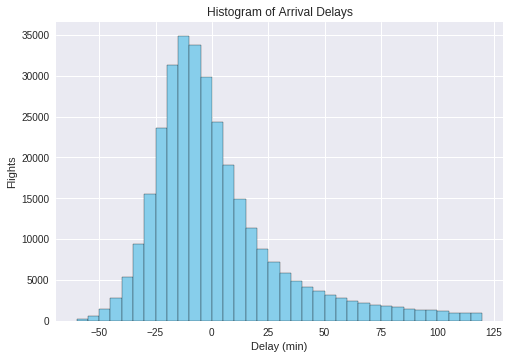

In [9]:
# matplotlib histogram
plt.hist(flights['arr_delay'], color = 'skyblue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

1.   The distribution is almost normal with slight negative skewness.
2.   It can be inferred that most of the flights arrived within the -25 to 25 minute interval of the scheduled time.



Let's analyze side by side histograms of top 5 airlines with max data points

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

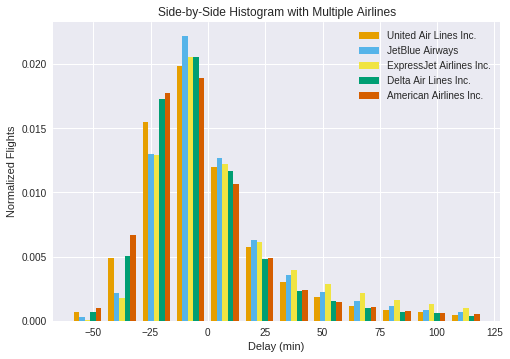

In [52]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

It can't be inferred much from this plot because of all the clutter. A few points to notice are:

1.   American Airlines is on top in terms of arriving way early than scheduled time
2.   ExpressJet Airlines lead in arriving late
3.   There are more chances of a flight arriving late than arriving early no matter which airline



Now it's time to go in more details and in a cleaner way by plotting the boxplots for all airlines' delays

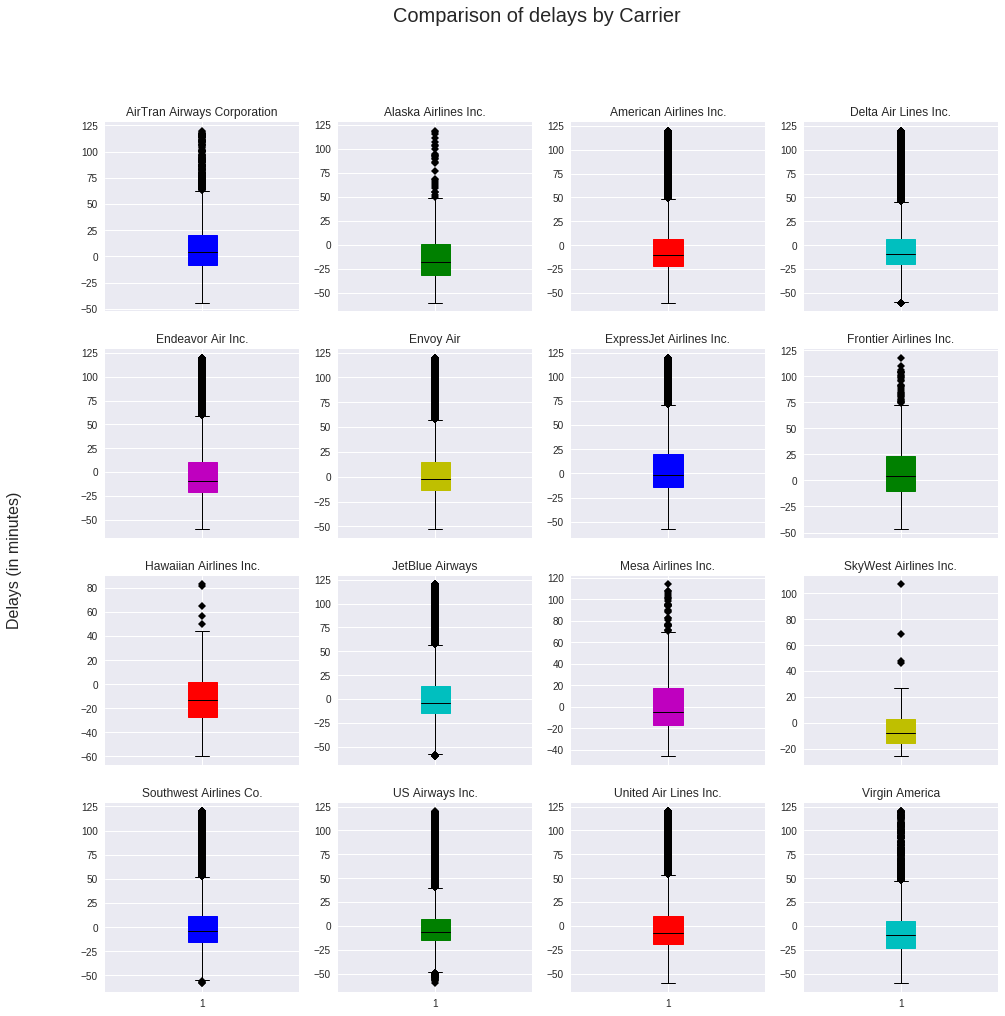

In [56]:
# Analyzing all the airlines at once using subplots and boxplots
fig, axs = plt.subplots(4, 4, sharex=True, sharey=False, figsize=(16,16))
fig.suptitle('Comparison of delays by Carrier', fontsize=20)
fig.text(0.04, 0.5, 'Delays (in minutes)', va='center', rotation='vertical', fontdict={'fontsize': 16})
cycol = cycle('bgrcmy')

num = 0
for i in range(4):
  for j in range(4):
    airline_name = airlines[num]
    bp = axs[i, j].boxplot(delays_by_carrier[airline_name], 0, 'kD',
                           patch_artist=True)
    axs[i, j].set_title(airline_name)
    plt.setp(bp['medians'], color='black')
    plt.setp(bp['boxes'], color=next(cycol))
    num += 1

### Observations

Based on the boxplots for all airlines, I would prefer to travel with **Hawaiian Airlines** because -
1.  The 3rd quartile is approximately 5 so it has less chance of getting delayed.
2.  The Maximum lies below the Maximums of all other airlines having substantial number of data points.
3.  The outliers are very few compared to other airlines having substantial number of data points.
4.  The second preference will be **Alaska Airlines** for same reasons.
5.  Had **SkyWest Airlines Inc.** have more data and had similar results as now, that would have also been an option.



# PART 2

### Import the libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import cycle

### Read in the data

In [2]:
flights = pd.read_csv('formatted_flights.csv', index_col=None)
flights.drop('Unnamed: 0', axis=1, inplace=True)
flights.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


### Make the sample

In [0]:
# Let's take 6 samples of from 20% to 70% of the data
samples = []
for i in range(6):
  sample = flights.sample(frac=0.2+i/10.0, random_state=i*5)
  samples.append(sample)

In [39]:
for sample in samples:
  print(len(sample))

63423
95134
126845
158556
190268
221979


### Plots


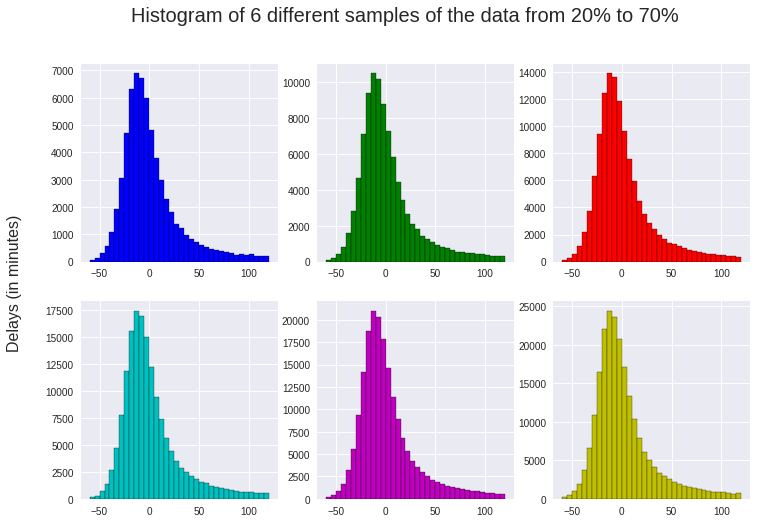

In [40]:
# Let's make histograms for all the samples
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(12,8))
fig.suptitle('Histogram of 6 different samples of the data from 20% to 70%', fontsize=20)
fig.text(0.04, 0.5, 'Delays (in minutes)', va='center', rotation='vertical', fontdict={'fontsize': 16})
cycol = cycle('bgrcmy')

num = 0
for i in range(2):
  for j in range(3):
    axs[i, j].hist(samples[num]['arr_delay'], color=next(cycol),
                   edgecolor='black', bins=int(180/5))    
    num += 1

Analyze mean of population and samples

In [41]:
print(flights['arr_delay'].mean())
print('===============================')
for sample in samples:
  print(sample['arr_delay'].mean())

1.2971432896160044
1.2956656102675685
1.2882145184686862
1.242429737080689
1.2630427104619188
1.2739399163285472
1.2820221732686425


Analyze standard deviation of poluplation and samples

In [42]:
print(np.std(flights['arr_delay']))
print('===============================')
for sample in samples:
  print(np.std(sample['arr_delay']))

29.064355196654887
29.137937543570064
29.098701008530625
29.036253631231766
29.087003750207852
29.03679873442276
29.05479348020667


### Observations



1.   The mean varies a lot and surprisingly its most close to the population mean for 20% sample size.
2.   The distribution becomes more and more normalized in very little increments as the sample size increases.
3.   The standard deviation of the sample is most close to the population when sample size is highest that is 70%. 
4.   The spread of the samples looks similar to the spread of population.

